### Translation

In [1]:
import numpy as np
import cv2 as cv

In [2]:
def show(img):
    # using cv
    cv.imshow("image", img)
    cv.waitKey(0)
    cv.destroyAllWindows()

In [4]:
image = cv.imread("../DATA/colors.jpg")
show(image)

In [5]:
M = np.float32([
    [1,0,25],
    [0,1,50]
])
shifted = cv.warpAffine(image, M, (image.shape[1],image.shape[0]))
show(shifted)


In [6]:
M = np.float32([
    [1,0,-25],
    [0,1,-50]
])
shifted = cv.warpAffine(image, M, (image.shape[1],image.shape[0]))
show(shifted)

In [7]:
def translate_image(image, x, y):
    M = np.float32([[1,0,x], [0,1,y]])
    shifted = cv.warpAffine(image, M, (image.shape[1], image.shape[0]))
    return shifted

In [8]:
shited = translate_image(image, -50, 90 )
show(shited)

### Rotation

In [9]:
(h,w) = image.shape[:2]
center = w//2 , h//2 
M = cv.getRotationMatrix2D(center, 45, 0.5)
rotated = cv.warpAffine(image, M, (w,h))
show(rotated)

In [10]:
### Write a function for rotation
def rotate(image, angle):
    rows, cols = image.shape[:2]
    M = cv.getRotationMatrix2D((cols/2, rows/2), angle, 1)
    dst = cv.warpAffine(image, M, (cols, rows))
    return dst
testing = rotate(image, 45)
show(testing)

### Resizing

In [11]:
h = image.shape[0]
w = image.shape[1]
r = 50.0 / h 
print(r)
dim = (int(w*r), 50) # (h,w)
resized = cv.resize(image, dim, interpolation=cv.INTER_AREA)
show(resized)

0.09259259259259259


In [13]:
import imutils 

In [14]:
resized = imutils.resize(image, height = 100)
show(resized)

In [16]:
### Write a function called display_image
def display_image(image):
    show(image)
display_image(resized)

### Flipping

In [19]:
flipped = cv.flip(image, 1 )
show(flipped)

In [20]:
flipped = cv.flip(image, 0 )
show(flipped)

In [21]:
flipped = cv.flip(image, -1 )
show(flipped)

### Cropping 

In [22]:
cropped = image[30:120, 240:335]
show(cropped)

### Arithmetics

In [25]:
M = np.ones(image.shape, dtype="uint8")*2
subtracted = cv.subtract(image, M )
show(subtracted)

In [26]:
rectangle = np.zeros((300, 300), dtype = "uint8")
cv.rectangle(rectangle, (25, 25), (275, 275), 255, -1)
show(rectangle)
circle = np.zeros((300, 300), dtype = "uint8")
cv.circle(circle, (150, 150), 150, 255, -1)
show(circle)

### Bitwise operations

In [27]:
bitwiseAnd = cv.bitwise_and(rectangle, circle)
show(bitwiseAnd)

In [28]:
bitwiseOr = cv.bitwise_or(rectangle, circle)
show(bitwiseOr)

In [29]:
bitwiseOr = cv.bitwise_xor(rectangle, circle)
show(bitwiseOr)

In [30]:
bitwiseOr = cv.bitwise_not(rectangle, circle)
show(bitwiseOr)

### Masking

In [31]:
mask = np.zeros(image.shape[:2], dtype="uint8")
(cX, cY) = image.shape[1] //2 , image.shape[0] // 2 
cv.rectangle(mask, (cX - 75, cY-75) , (cX + 75 , cY + 75) , 255 , -1)
show(mask)

In [32]:
masked_image = cv.bitwise_and(image, image , mask=mask )
show(masked_image)

### Color Spaces

In [33]:

gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
show(gray)
hsv = cv.cvtColor(image, cv.COLOR_BGR2HSV)
show(hsv)
lab = cv.cvtColor(image, cv.COLOR_BGR2LAB)
show(lab)

### Histograms


In [34]:
import matplotlib.pyplot as plt
image = cv.imread("../DATA/grayscale_image.jpg")
image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
show(image)


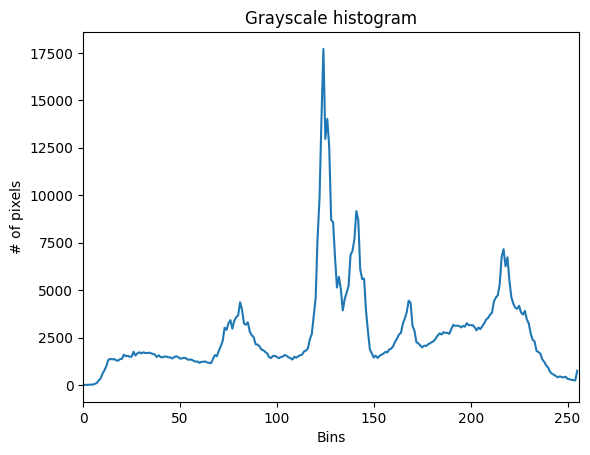

In [35]:
hist = cv.calcHist([image] , [0], None, [256] , [0,256])
plt.figure()
plt.title("Grayscale histogram")
plt.xlabel("Bins")
plt.ylabel("# of pixels")
plt.plot(hist)
plt.xlim([0,256])
plt.show()

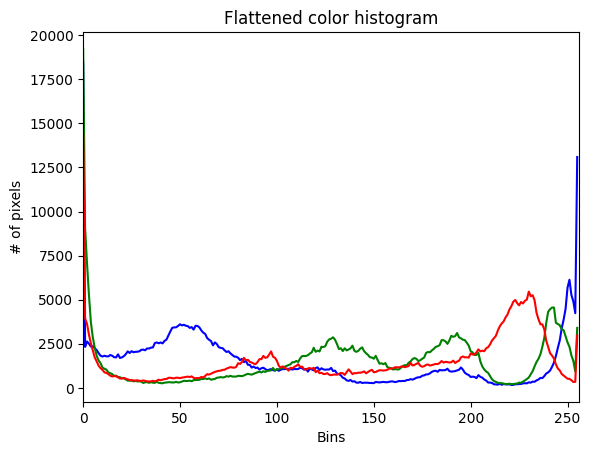

In [36]:
image = cv.imread("../DATA/colors.jpg")
chans = cv.split(image)
colors = ("b", "g" , "r")
plt.figure()
plt.title("Flattened color histogram")
plt.xlabel("Bins")
plt.ylabel("# of pixels")

for (chan, color) in zip(chans, colors):
    hist = cv.calcHist([chan], [0],None, [256] , [0,256])
    plt.plot(hist, color=color)
    plt.xlim([0,256])

### Smoothing and blurring

In [38]:
image = cv.imread("../DATA/colors.jpg")
blurred = np.hstack(
    [
        cv.blur(image, (3,3)),
        cv.blur(image, (5,5)),
        cv.blur(image, (7,7))
    ]
)
show(blurred)

In [39]:
blurred = np.hstack(
    [
        cv.medianBlur(image, 3),
        cv.medianBlur(image, 5),
        cv.medianBlur(image, 7)
        
        
    ]
)
show(blurred)